Buy and sell strategy on ethereum and JPY and XAU data by combining short and long indicators

In [1]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29089 sha256=f680a8d5dc5823d58651719ec6b8faef6361350305e87a993aecadfc0bbff685
  Stored in directory: /root/.cache/pip/wheels/47/51/06/380dc516ea78621870b93ff65527c251afdfdc5fa9d7f4d248
Successfully built ta


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


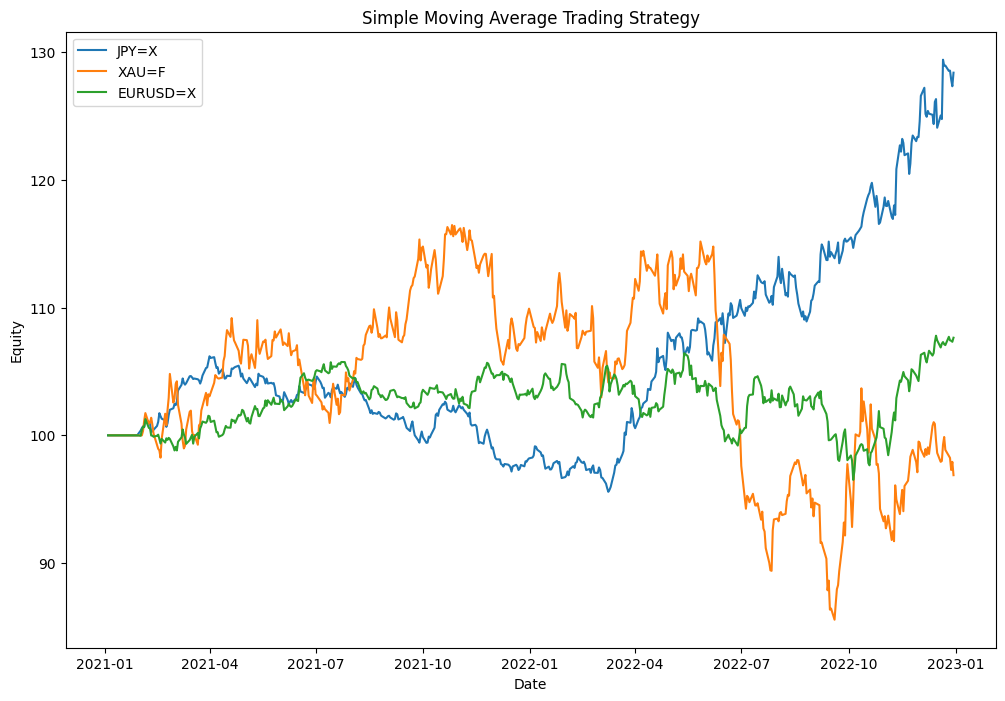

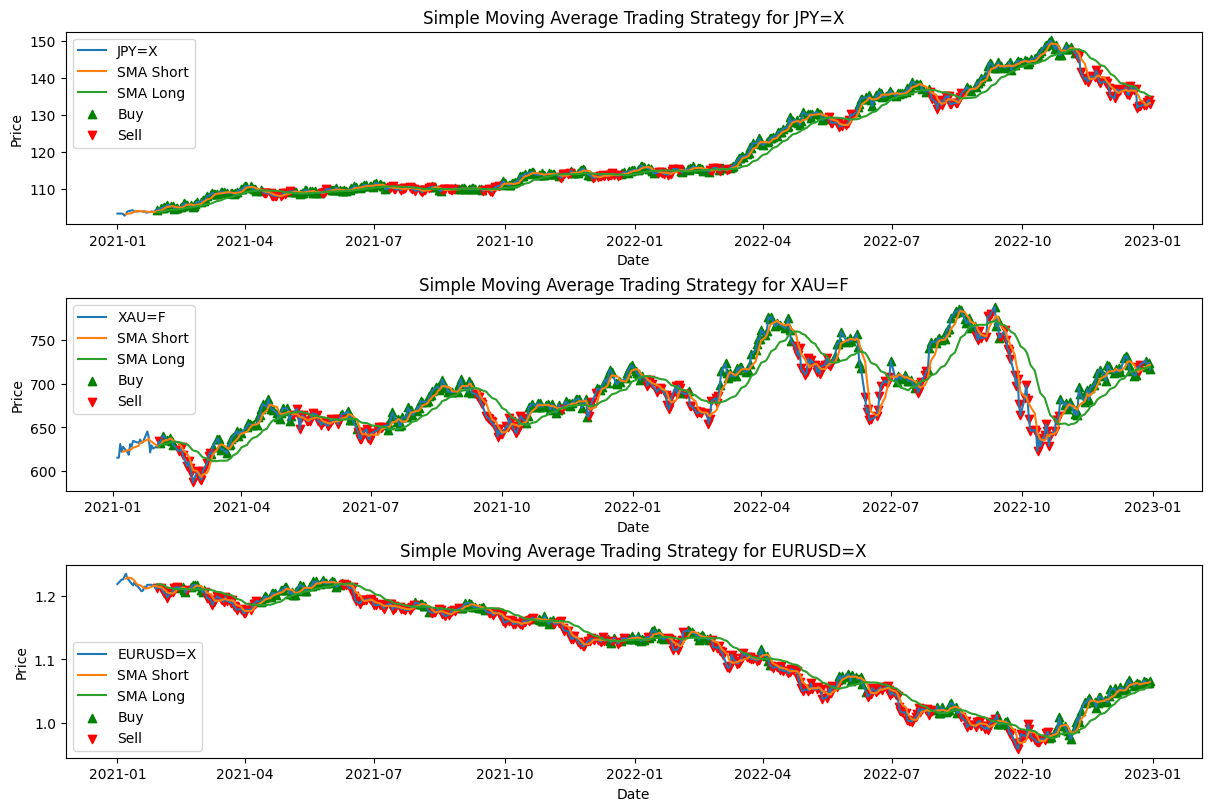

In [2]:
import yfinance as yf
import ta
import matplotlib.pyplot as plt

# Define the digital asset symbols and the start and end dates for downloading historical data

# Define the parameters
symbol1 = 'JPY=X'
symbol2 = 'XAU=F'
symbol3 = 'EURUSD=X'
start_date = '2021-01-01'
end_date = '2023-01-01'

short_window = 5
long_window = 21

# sma: data['close'].rolling(window_size=21).mean()

# Download historical data for both digital assets
data1 = yf.download(symbol1, start=start_date, end=end_date)
data2 = yf.download(symbol2, start=start_date, end=end_date)
data3 = yf.download(symbol3, start=start_date, end=end_date)

# Calculate short-term and long-term SMAs for both digital assets

data1['sma_short'] = ta.trend.sma_indicator(data1['Close'], window=short_window)
data1['sma_long'] = ta.trend.sma_indicator(data1['Close'], window=long_window)

data2['sma_short'] = ta.trend.sma_indicator(data2['Close'], window=short_window)
data2['sma_long'] = ta.trend.sma_indicator(data2['Close'], window=long_window)

data3['sma_short'] = ta.trend.sma_indicator(data3['Close'], window=short_window)
data3['sma_long'] = ta.trend.sma_indicator(data3['Close'], window=long_window)

# Generate buy and sell signals based on the short-term and long-term SMAs
data1['signal'] = 0
# boleain:  data1['sma_short'] >< data1['sma_long']=condition
# data1.loc[condition, 'signal'] = 1 or -1
data1.loc[data1['sma_short'] > data1['sma_long'], 'signal'] = 1
data1.loc[data1['sma_short'] < data1['sma_long'], 'signal'] = -1

data2['signal'] = 0
data2.loc[data2['sma_short'] > data2['sma_long'], 'signal'] = 1
data2.loc[data2['sma_short'] < data2['sma_long'], 'signal'] = -1

data3['signal'] = 0
data3.loc[data3['sma_short'] > data3['sma_long'], 'signal'] = 1
data3.loc[data3['sma_short'] < data3['sma_long'], 'signal'] = -1

# Calculate daily returns and cumulative investment returns for both digital assets
data1['returns'] = data1['Close'].pct_change() * data1['signal'].shift(1)
data1['daily_returns'] = data1['returns'] / data1['Close'].shift(1)  # Normalized return
data1['cumulative_returns'] = (1 + data1['returns']).cumprod() * 100

data2['returns'] = data2['Close'].pct_change() * data2['signal'].shift(1)
data2['daily_returns'] = data2['returns'] / data2['Close'].shift(1)
data2['cumulative_returns'] = (1 + data2['returns']).cumprod() * 100

data3['returns'] = data3['Close'].pct_change() * data3['signal'].shift(1)
data3['daily_returns'] = data3['returns'] / data3['Close'].shift(1)
data3['cumulative_returns'] = (1 + data3['returns']).cumprod() * 100

# Plot the equity curve and buy/sell signals
plt.figure(figsize=(12, 8))
plt.plot(data1['cumulative_returns'], label=symbol1)
plt.plot(data2['cumulative_returns'], label=symbol2)
plt.plot(data3['cumulative_returns'], label=symbol3)
plt.title('Simple Moving Average Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Equity')
plt.legend()
plt.show()

# Plot the equity curve and buy/sell signals for each digital asset
fig, axs = plt.subplots(3, 1, figsize=(12, 8), layout='constrained')

axs[0].plot(data1.index, data1['Close'], label=symbol1)
axs[0].plot(data1.index, data1['sma_short'], label='SMA Short')
axs[0].plot(data1.index, data1['sma_long'], label='SMA Long')
axs[0].scatter(data1[data1['signal'] == 1].index, data1[data1['signal'] == 1]['Close'], marker='^', color='green', label='Buy')
axs[0].scatter(data1[data1['signal'] ==-1].index, data1[data1['signal'] == -1]['Close'], marker='v', color='red', label='Sell')
axs[0].set_title('Simple Moving Average Trading Strategy for ' + symbol1)
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price')
axs[0].legend()

axs[1].plot(data2.index, data2['Close'], label=symbol2)
axs[1].plot(data2.index, data2['sma_short'], label='SMA Short')
axs[1].plot(data2.index, data2['sma_long'], label='SMA Long')
axs[1].scatter(data2[data2['signal'] == 1].index, data2[data2['signal'] == 1]['Close'], marker='^', color='green', label='Buy')
axs[1].scatter(data2[data2['signal'] == -1].index, data2[data2['signal'] == -1]['Close'], marker='v', color='red', label='Sell')
axs[1].set_title('Simple Moving Average Trading Strategy for ' + symbol2)
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price')
axs[1].legend()

axs[2].plot(data3.index, data3['Close'], label=symbol3)
axs[2].plot(data3.index, data3['sma_short'], label='SMA Short')
axs[2].plot(data3.index, data3['sma_long'], label='SMA Long')
axs[2].scatter(data3[data3['signal'] == 1].index, data3[data3['signal'] == 1]['Close'], marker='^', color='green', label='Buy')
axs[2].scatter(data3[data3['signal'] == -1].index, data3[data3['signal'] == -1]['Close'], marker='v', color='red', label='Sell')
axs[2].set_title('Simple Moving Average Trading Strategy for ' + symbol3)
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Price')
axs[2].legend()

plt.show()